Text(0.5, 0.98, 'DON Close Price for All Days')

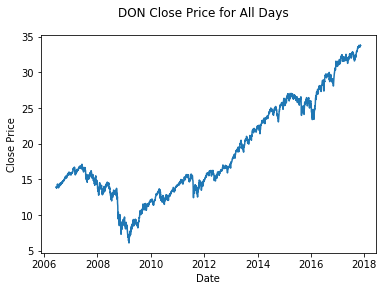

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import numpy as np
import os 
#getting data 
don_df = pd.read_csv('ETFS/don.us.csv')
days = [30, 60, 90, 120]
start_day = 2000

def prep_df(df):
    df.columns = df.columns.str.lower()
    df.index = pd.to_datetime(df.date)
    return df

def get_start_date(df, start_day):
    day1 = datetime.datetime.strptime(df.date[0], '%Y-%m-%d')
    start_date = day1 + datetime.timedelta(days=start_day)
    return start_date

def get_end_date(initial_date, num_days):
    end_date = initial_date + timedelta(days=num_days)
    return end_date
don_all_days = prep_df(don_df)

don_all_days_close = don_all_days.close      

start_date = get_start_date(don_all_days, start_day)

end_dates_lst = [(get_end_date(start_date, i)) for i in days]


plt.plot(don_all_days_close)
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.suptitle('DON Close Price for All Days')


Text(0.5, 1.0, '120 Day DON Close Price 2011-12-07 00:00:00 to 2012-04-05 00:00:00')

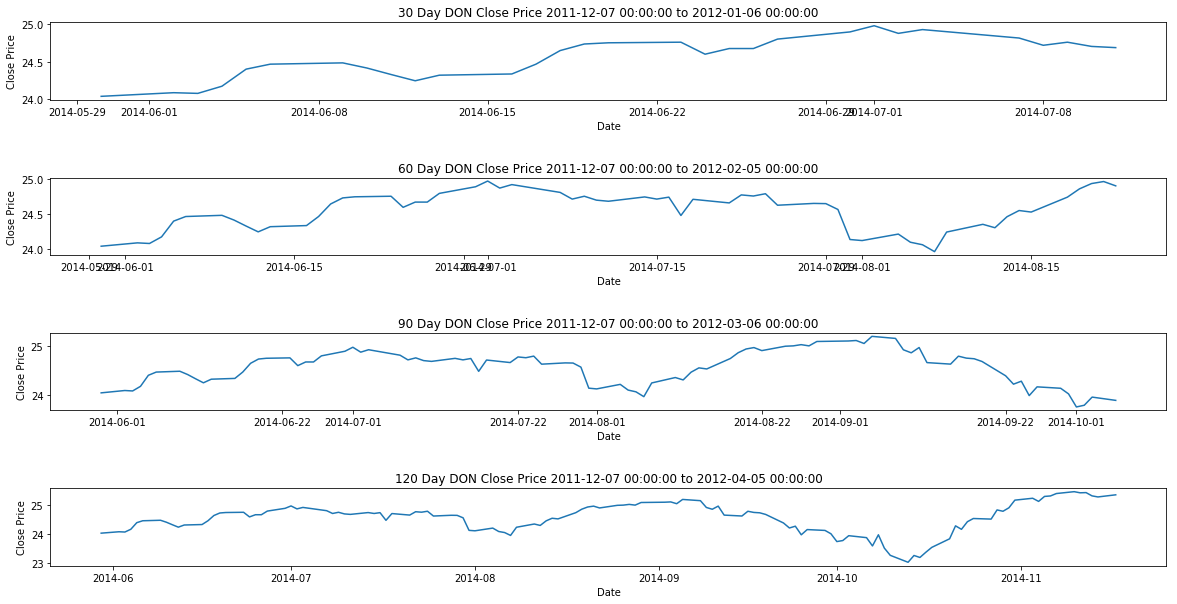

In [24]:
def get_close_prices(start_day, lst_days, df):
    dict_dfs = {}
    for i in lst_days:
        dict_dfs[i] = df.close.iloc[start_day: start_day + i]
    return dict_dfs

don_close_dict = get_close_prices(start_day, days, don_all_days)


thirty_day, sixty_day = don_close_dict[30], don_close_dict[60]
ninety_day, hundred_twenty_day = don_close_dict[90], don_close_dict[120]

fig, axes = plt.subplots(4, gridspec_kw={'hspace': 1, 'wspace': 1}, figsize=(20,10))
for ax in axes.flat:
    ax.set(xlabel='Date', ylabel='Close Price')
    

axes[0].plot(thirty_day)
axes[0].set_title('30 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[0]))

axes[1].plot(sixty_day)
axes[1].set_title('60 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[1]))

axes[2].plot(ninety_day)
axes[2].set_title('90 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[2]))


axes[3].plot(hundred_twenty_day)
axes[3].set_title('120 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[3]))



In [25]:
#Apply Augmented Dickey-Fuller test to whole data set to see test stationarity 
#(though from the graphs, seasonality and trends are usually obvious)

from statsmodels.tsa.stattools import adfuller
def adf(df):
    aug_dickey_fuller = adfuller(df, autolag='AIC')
    df_results_all = pd.Series(aug_dickey_fuller[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in aug_dickey_fuller[4].items():
        df_results_all['Critical Value ({})'.format(key)] = value
    print(df_results_all)
    

print('ADF results for all days')
adf(don_all_days_close)
print("ADF results for 30 days")
adf(don_close_dict[30])

print("ADF results for 60 days")
adf(don_close_dict[60])

print("ADF test 90 days")
adf(don_close_dict[90])

print("ADF test 120 days")
adf(don_close_dict[120])
#Dickey Fuller indicates the data is nonstationary

ADF results for all days
test statistic             0.889982
p-value                    0.992958
# of lags                  5.000000
# of observations       2866.000000
Critical Value (1%)       -3.432634
Critical Value (5%)       -2.862549
Critical Value (10%)      -2.567307
dtype: float64
ADF results for 30 days
test statistic          -1.885050
p-value                  0.339126
# of lags                9.000000
# of observations       20.000000
Critical Value (1%)     -3.809209
Critical Value (5%)     -3.021645
Critical Value (10%)    -2.650713
dtype: float64
ADF results for 60 days
test statistic          -2.004225
p-value                  0.284724
# of lags                0.000000
# of observations       59.000000
Critical Value (1%)     -3.546395
Critical Value (5%)     -2.911939
Critical Value (10%)    -2.593652
dtype: float64
ADF test 90 days
test statistic          -1.527596
p-value                  0.519819
# of lags                0.000000
# of observations       89.000000
C

Text(0.5, 1.0, 'Log Transformed 120 Day DON Close Price 2011-12-07 00:00:00 to 2012-04-05 00:00:00')

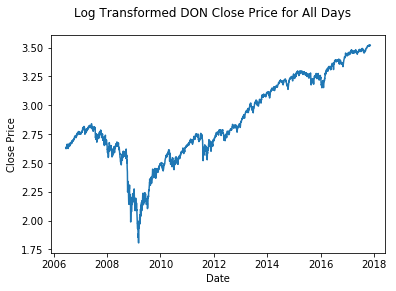

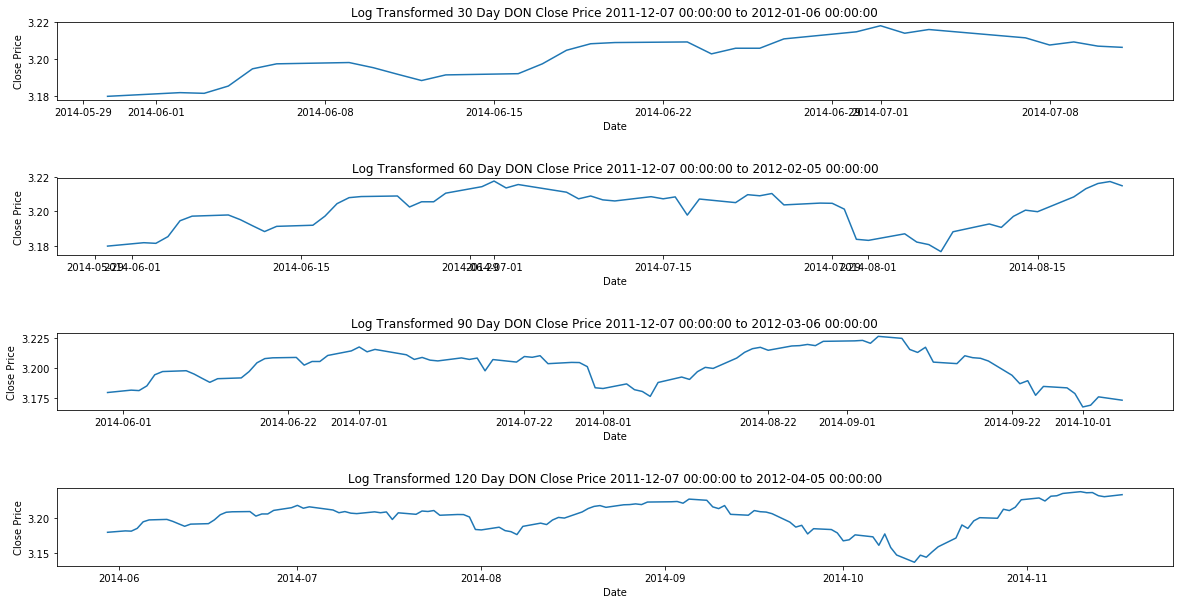

In [26]:
#Transform data to remove trend 
#transform by log
def log_transform(df_dict):
    log_df_dict = {}
    for i in df_dict:
        log_df_dict[i] = np.log(df_dict[i])
    return log_df_dict

don_all_days_log = np.log(don_all_days_close)
plt.plot(don_all_days_log)
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.suptitle('Log Transformed DON Close Price for All Days')

don_log_dict = log_transform(don_close_dict)
fig, axes = plt.subplots(4, gridspec_kw={'hspace': 1, 'wspace': 1}, figsize=(20,10))
for ax in axes.flat:
    ax.set(xlabel='Date', ylabel='Close Price')
    
    
thirty_day_log, sixty_day_log = don_log_dict[30], don_log_dict[60]
ninety_day_log, hundred_twenty_day_log = don_log_dict[90], don_log_dict[120]


axes[0].plot(thirty_day_log)
axes[0].set_title('Log Transformed 30 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[0]))

axes[1].plot(sixty_day_log)
axes[1].set_title('Log Transformed 60 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[1]))

axes[2].plot(ninety_day_log)
axes[2].set_title('Log Transformed 90 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[2]))

axes[3].plot(hundred_twenty_day_log)
axes[3].set_title('Log Transformed 120 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[3]))




In [27]:
print("ADF after log transformation")

print("all days")
print(adf(don_all_days_log))

print("30 days")
print(adf(don_log_dict[30]))

print("60 days")
print(adf(don_log_dict[60]))

print("90 days")
print(adf(don_log_dict[90]))

print("120 days")
print(adf(don_log_dict[120]))

# #note the moderate improvements 

ADF after log transformation
all days
test statistic            -0.160825
p-value                    0.943033
# of lags                 10.000000
# of observations       2861.000000
Critical Value (1%)       -3.432638
Critical Value (5%)       -2.862551
Critical Value (10%)      -2.567308
dtype: float64
None
30 days
test statistic          -1.882729
p-value                  0.340229
# of lags                9.000000
# of observations       20.000000
Critical Value (1%)     -3.809209
Critical Value (5%)     -3.021645
Critical Value (10%)    -2.650713
dtype: float64
None
60 days
test statistic          -2.013978
p-value                  0.280478
# of lags                0.000000
# of observations       59.000000
Critical Value (1%)     -3.546395
Critical Value (5%)     -2.911939
Critical Value (10%)    -2.593652
dtype: float64
None
90 days
test statistic          -1.524657
p-value                  0.521281
# of lags                0.000000
# of observations       89.000000
Critical Value

In [37]:
def diff_df(df_dict):
    diff_df_dict = {}
    for i in df_dict:
        diff_df_dict[i] = (df_dict[i] - df_dict[i].shift()).dropna()
    return diff_df_dict

don_all_days_diff = (don_all_days_close - don_all_days_close.shift()).dropna()
don_diff_dict = diff_df(don_close_dict)

print("ADF after differencing")

print("all days")
print(adf(don_all_days_diff))

print("30 days")
print(adf(don_diff_dict[30]))

print("60 days")
print(adf(don_diff_dict[60]))

print("90 days")
print(adf(don_diff_dict[90]))

print("120 days")
print(adf(don_diff_dict[120]))


ADF after differencing
all days
test statistic         -1.849253e+01
p-value                 2.125849e-30
# of lags               2.500000e+01
# of observations       2.844000e+03
Critical Value (1%)    -3.432651e+00
Critical Value (5%)    -2.862557e+00
Critical Value (10%)   -2.567311e+00
dtype: float64
None
30 days
test statistic          -1.311093
p-value                  0.624082
# of lags                5.000000
# of observations       23.000000
Critical Value (1%)     -3.752928
Critical Value (5%)     -2.998500
Critical Value (10%)    -2.638967
dtype: float64
None
60 days
test statistic         -7.160454e+00
p-value                 2.977555e-10
# of lags               0.000000e+00
# of observations       5.800000e+01
Critical Value (1%)    -3.548494e+00
Critical Value (5%)    -2.912837e+00
Critical Value (10%)   -2.594129e+00
dtype: float64
None
90 days
test statistic         -9.217157e+00
p-value                 1.820791e-15
# of lags               0.000000e+00
# of observations

Text(0.5, 1.0, 'Differenced Log Transformed 120 Day DON Close Price 2011-12-07 00:00:00 to 2012-04-05 00:00:00')

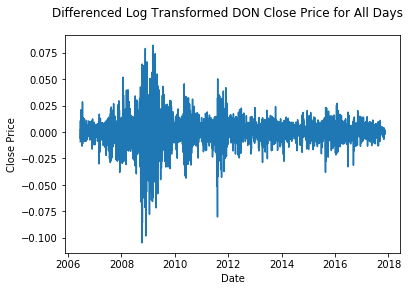

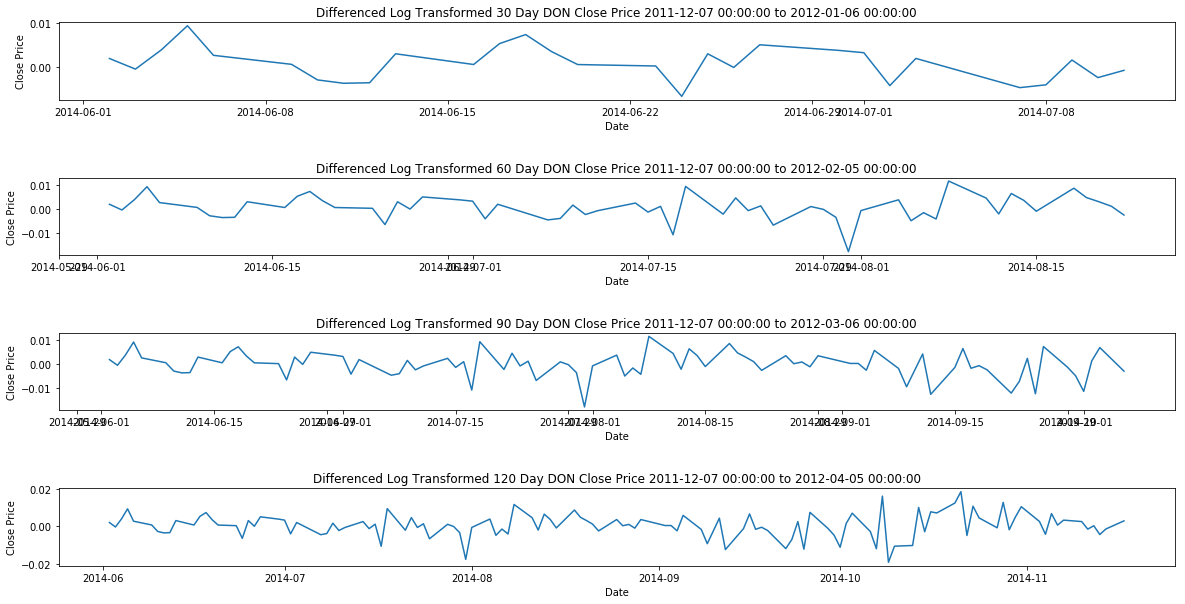

In [34]:
#Difference data to remove seasonality

def diff_df(df_dict):
    diff_df_dict = {}
    for i in df_dict:
        diff_df_dict[i] = (df_dict[i] - df_dict[i].shift()).dropna()
    return diff_df_dict

don_all_days_log_diff = (don_all_days_log - don_all_days_log.shift()).dropna()


don_log_diff_dict = diff_df(don_log_dict)

don_all_days_log = np.log(don_all_days_close)
plt.plot(don_all_days_log_diff)
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.suptitle('Differenced Log Transformed DON Close Price for All Days')

fig, axes = plt.subplots(4, gridspec_kw={'hspace': 1, 'wspace': 1}, figsize=(20,10))
for ax in axes.flat:
    ax.set(xlabel='Date', ylabel='Close Price')
    
thirty_day_log_diff, sixty_day_log_diff = don_log_diff_dict[30], don_log_diff_dict[60]
ninety_day_log_diff, hundred_twenty_day_log_diff = don_log_diff_dict[90], don_log_diff_dict[120]


axes[0].plot(thirty_day_log_diff)
axes[0].set_title('Differenced Log Transformed 30 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[0]))

axes[1].plot(sixty_day_log_diff)
axes[1].set_title('Differenced Log Transformed 60 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[1]))

axes[2].plot(ninety_day_log_diff)
axes[2].set_title('Differenced Log Transformed 90 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[2]))

axes[3].plot(hundred_twenty_day_log_diff)
axes[3].set_title('Differenced Log Transformed 120 Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[3]))



In [29]:
print("ADF after log transformation and differencing")

print("all days")
print(adf(don_all_days_log_diff))

print("30 days")
print(adf(don_log_diff_dict[30]))

print("60 days")
print(adf(don_log_diff_dict[60]))

print("90 days")
print(adf(don_log_diff_dict[90]))

print("120 days")
print(adf(don_log_diff_dict[120]))


ADF after log transformation and differencing
all days
test statistic         -1.660268e+01
p-value                 1.758868e-29
# of lags               9.000000e+00
# of observations       2.861000e+03
Critical Value (1%)    -3.432638e+00
Critical Value (5%)    -2.862551e+00
Critical Value (10%)   -2.567308e+00
dtype: float64
None
30 days
test statistic          -1.313370
p-value                  0.623034
# of lags                5.000000
# of observations       23.000000
Critical Value (1%)     -3.752928
Critical Value (5%)     -2.998500
Critical Value (10%)    -2.638967
dtype: float64
None
60 days
test statistic         -7.154604e+00
p-value                 3.077926e-10
# of lags               0.000000e+00
# of observations       5.800000e+01
Critical Value (1%)    -3.548494e+00
Critical Value (5%)    -2.912837e+00
Critical Value (10%)   -2.594129e+00
dtype: float64
None
90 days
test statistic         -9.214694e+00
p-value                 1.847350e-15
# of lags               0.00000

In [45]:
don_log_diff_2_30 = (don_log_diff_dict[30]- don_log_diff_dict[30].shift()).dropna()
print('Twice differenced log transformed 30 Day ADF')
print(adf(don_log_diff_2_30))
print('Thrice differenced log transformed 30 Day ADF')
don_log_diff_3_30 = (don_log_diff_2_30 - don_log_diff_2_30.shift()).dropna()
print('Thrice differenced log transformed 30 Day ADF')
print(adf(don_log_diff_3_30))

Twice differenced log transformed 30 Day ADF
test statistic          -0.660611
p-value                  0.856690
# of lags                9.000000
# of observations       18.000000
Critical Value (1%)     -3.859073
Critical Value (5%)     -3.042046
Critical Value (10%)    -2.660906
dtype: float64
None
Thrice differenced log transformed 30 Day ADF
Thrice differenced log transformed 30 Day ADF
test statistic          -4.970377
p-value                  0.000025
# of lags                8.000000
# of observations       18.000000
Critical Value (1%)     -3.859073
Critical Value (5%)     -3.042046
Critical Value (10%)    -2.660906
dtype: float64
None
